In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_absolute_error, mean_squared_error

In [7]:
# Loading the dataset
data = pd.read_excel(r"C:\Users\ANJITH SM\ICT Exit Exam\Dataset2.xlsx")
data.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [153]:
df = data.copy()  # Copying the dataset to another value df
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494.0,231.526798,NaN,NaN,NaN,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


# **Data Preprocessing**

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13606 non-null  float64
 3   MinorAxisLength  13609 non-null  float64
 4   AspectRation     13608 non-null  float64
 5   Eccentricity     13608 non-null  float64
 6   ConvexArea       13610 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13608 non-null  float64
 9   Solidity         13610 non-null  float64
 10  roundness        13608 non-null  float64
 11  Compactness      13609 non-null  float64
 12  ShapeFactor1     13609 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [158]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13606.000000,13609.000000,13608.000000,13608.000000,13610.000000,13611.000000,13608.000000,13610.000000,13608.000000,13609.000000,13609.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.157483,202.271934,1.583306,0.750929,53769.027921,253.064220,0.749727,0.987143,0.873267,0.799845,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.704732,44.973272,0.246650,0.091961,29775.853140,59.177120,0.049089,0.004660,0.059518,0.061695,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.301679,175.842829,1.432357,0.715952,36713.750000,215.068003,0.718631,0.985670,0.832053,0.762449,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.909450,192.431733,1.551132,0.764444,45189.000000,238.438026,0.759830,0.988283,0.883132,0.801243,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.507661,217.033886,1.707187,0.810485,62298.500000,279.446467,0.786851,0.990013,0.916853,0.834244,0.007272,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


**Finding the number of unique values in each column**

In [161]:
# Finding the number of unique values in each column

categorical_cols = df.select_dtypes(include = ['object']).columns
print('CATEGORICAL COLUMNS')
for col in categorical_cols:
  unique_count = df[col].nunique()
  print(f"Column '{col}' has *{unique_count}* unique values")

numerical_cols = df.select_dtypes(include = ['number']).columns
print('NUMERICAL COLUMNS')
for col in numerical_cols:
  unique_count = df[col].nunique()
  print(f"Column '{col}' has *{unique_count}* unique values")

CATEGORICAL COLUMNS
Column 'Class' has *7* unique values
NUMERICAL COLUMNS
Column 'Area' has *12011* unique values
Column 'Perimeter' has *13416* unique values
Column 'MajorAxisLength' has *13538* unique values
Column 'MinorAxisLength' has *13541* unique values
Column 'AspectRation' has *13540* unique values
Column 'Eccentricity' has *13540* unique values
Column 'ConvexArea' has *12066* unique values
Column 'EquivDiameter' has *12011* unique values
Column 'Extent' has *13532* unique values
Column 'Solidity' has *13525* unique values
Column 'roundness' has *13540* unique values
Column 'Compactness' has *13541* unique values
Column 'ShapeFactor1' has *13541* unique values
Column 'ShapeFactor2' has *13543* unique values
Column 'ShapeFactor3' has *13543* unique values
Column 'ShapeFactor4' has *13543* unique values


**Filling the columns having missing values with the median values in the column**

In [163]:
# Finding the columns with missingvalues
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    5
MinorAxisLength    2
AspectRation       3
Eccentricity       3
ConvexArea         1
EquivDiameter      0
Extent             3
Solidity           1
roundness          3
Compactness        2
ShapeFactor1       2
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [165]:
values1 = df["MajorAxisLength"].median()
values2 = df["MinorAxisLength"].median()
values3 = df["AspectRation"].median()
values4 = df["Eccentricity"].median()
values5 = df["ConvexArea"].median()
values6 = df["Extent"].median()
values7 = df["Solidity"].median()
values8 = df["roundness"].median()
values9 = df["Compactness"].median()
values10 = df["ShapeFactor1"].median()

In [167]:
df["MajorAxisLength"] = df["MajorAxisLength"].fillna(values1)
df["MinorAxisLength"] = df["MinorAxisLength"].fillna(values2)
df["AspectRation"] = df["AspectRation"].fillna(values3)
df["Eccentricity"] = df["Eccentricity"].fillna(values4)
df["ConvexArea"] = df["ConvexArea"].fillna(values5)
df["Extent"] = df["Extent"].fillna(values6)
df["Solidity"] = df["Solidity"].fillna(values7)
df["roundness"] = df["roundness"].fillna(values8)
df["Compactness"] = df["Compactness"].fillna(values9)
df["ShapeFactor1"] = df["ShapeFactor1"].fillna(values10)

In [169]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

**Converting the categorical column into numerical column**

In [174]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [176]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494.0,231.526798,0.759830,0.988283,0.883132,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


In [178]:
corr_mat = df.select_dtypes(include=['int','float64']).columns
correlation_matrix = df[corr_mat].corr()

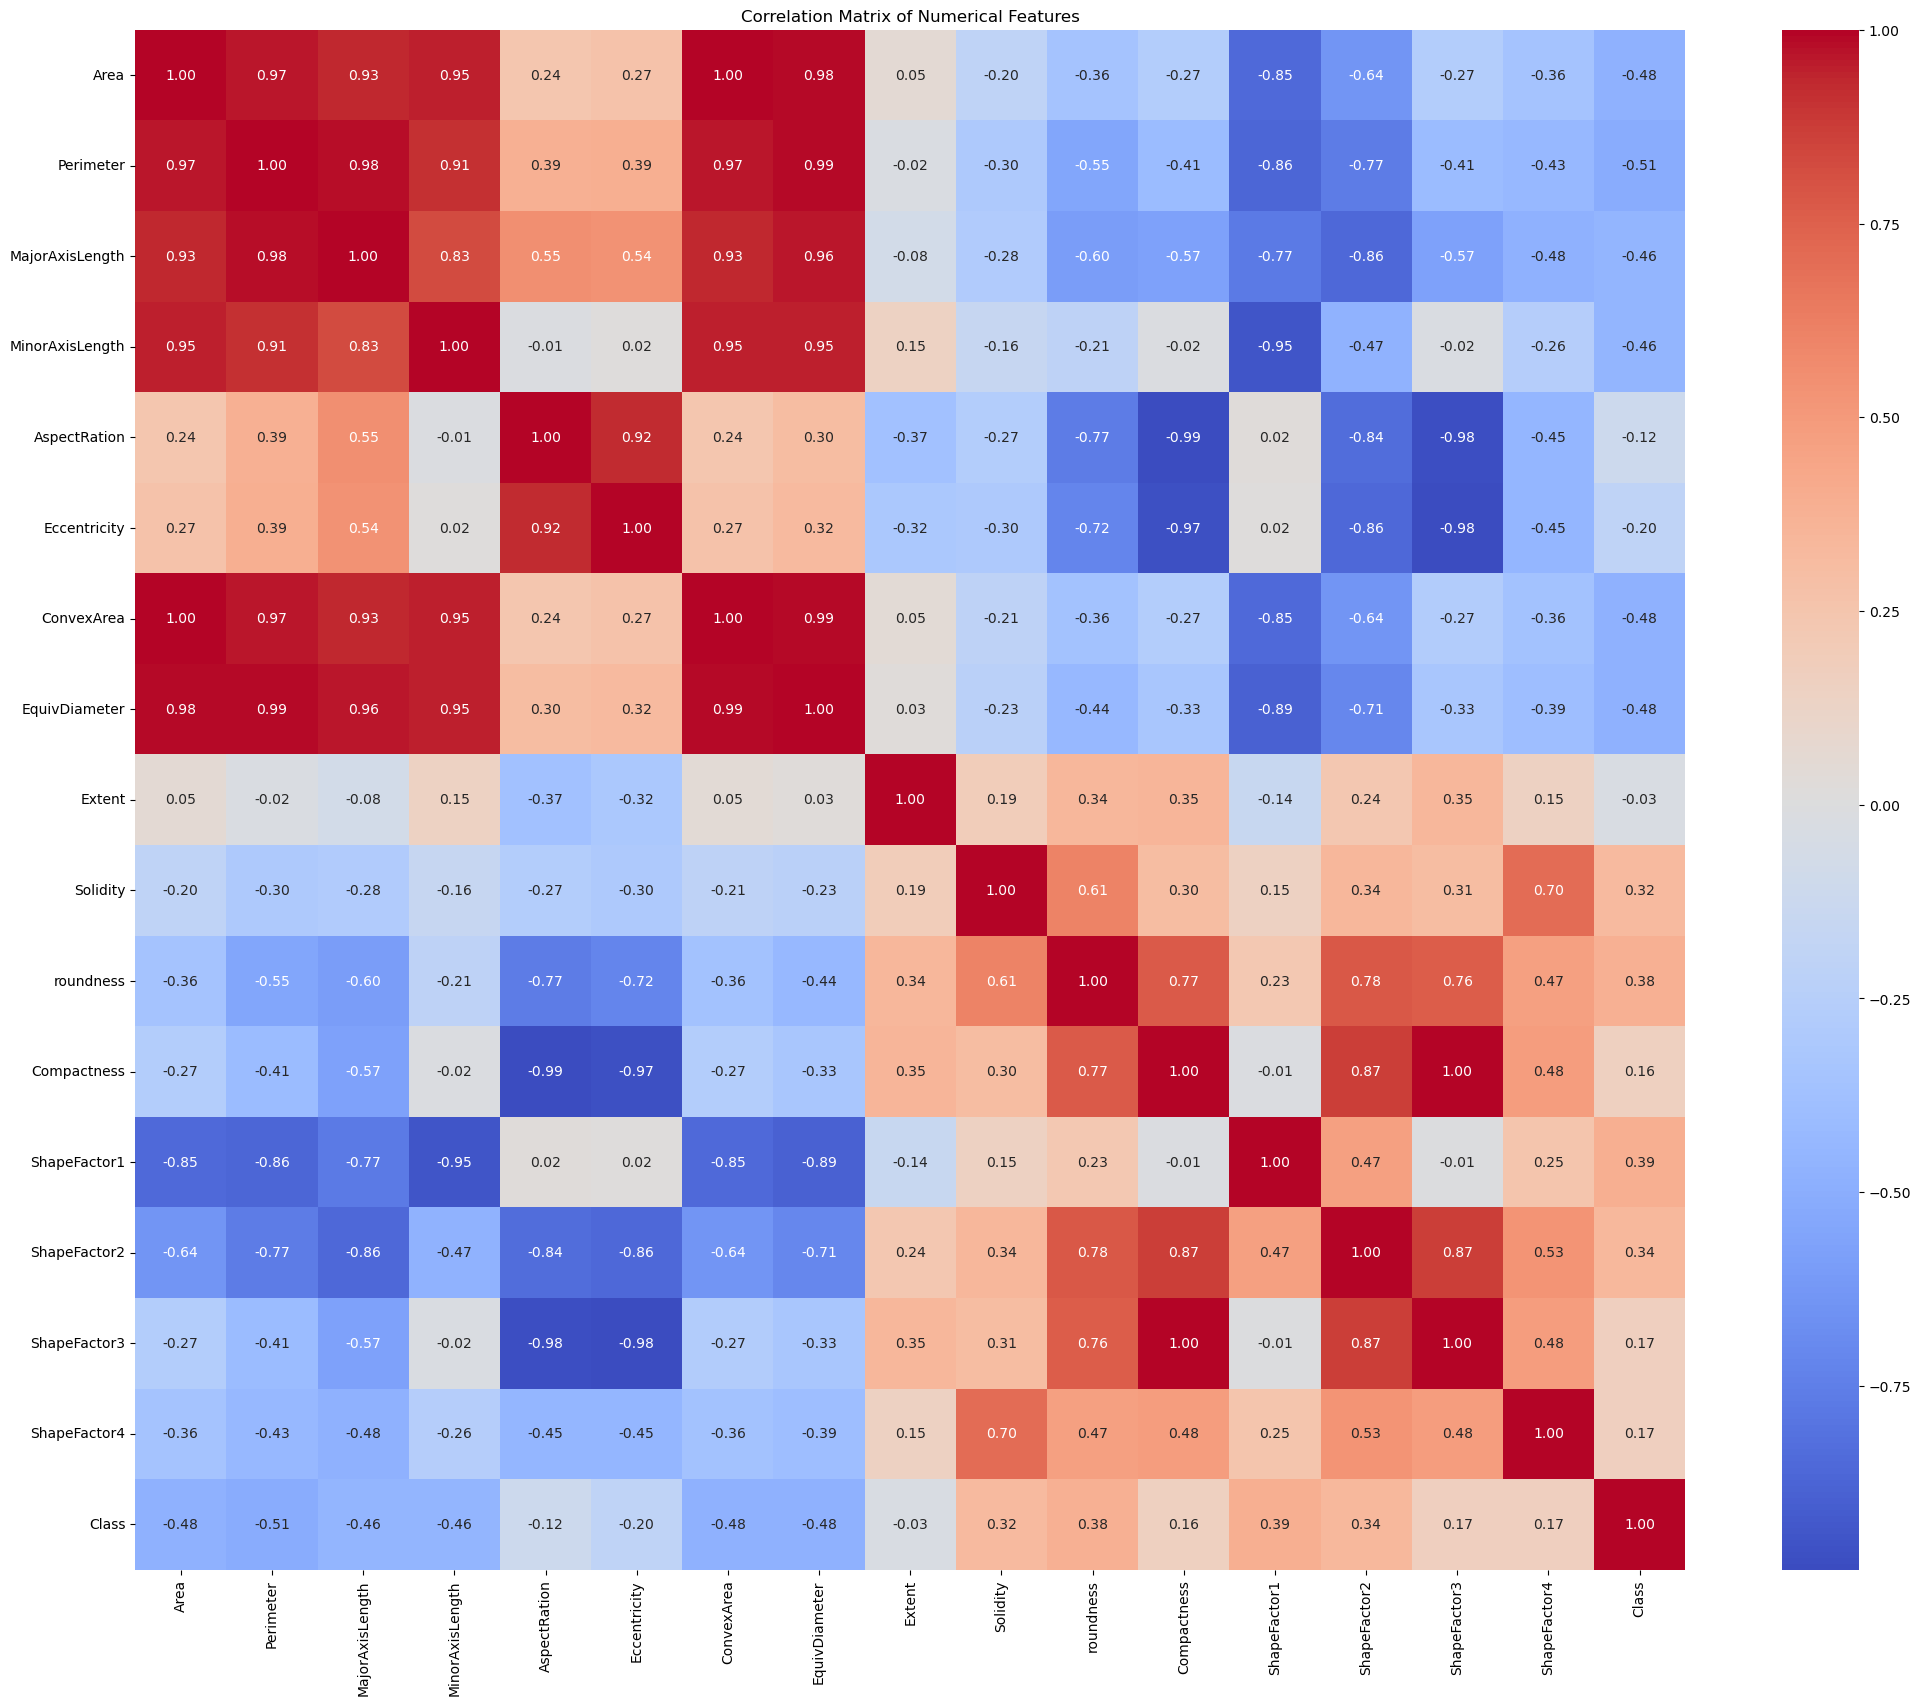

In [180]:
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [189]:
label_column = 'Class'
numerical_df = df.select_dtypes(include=['number'])  # Select only numerical features for correlation analysis
correlation_with_label = numerical_df.corr()[label_column]
correlation_threshold = 0.3  # Set a threshold for correlation
highly_correlated_cols = correlation_with_label[abs(correlation_with_label) > correlation_threshold].index.tolist()

# Removing the label column itself from the list
if label_column in highly_correlated_cols:
    highly_correlated_cols.remove(label_column)

print("Columns highly correlated with the label:")
print(highly_correlated_cols)

Columns highly correlated with the label:
['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter', 'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor2']


**The columns having correlation with the the column class is choosen for model training**

### **Outlier Detection**

In [193]:
# The selected columns are checked for outliers

df_filtered = highly_correlated_cols + ['Class']
df_filtered

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'ConvexArea',
 'EquivDiameter',
 'Solidity',
 'roundness',
 'ShapeFactor1',
 'ShapeFactor2',
 'Class']

In [197]:
df_filtered = df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter', 'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor2', 'Class']]
df_filtered.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,ConvexArea,EquivDiameter,Solidity,roundness,ShapeFactor1,ShapeFactor2,Class
0,28395,610.291,208.178117,173.888747,28715.0,190.141097,0.988856,0.958027,0.007332,0.003147,5
1,28734,638.018,200.524796,182.734419,29172.0,191.272750,0.984986,0.887034,0.006979,0.003564,5
2,29380,624.110,212.826130,175.931143,29690.0,193.410904,0.989559,0.947849,0.007244,0.003048,5
3,30008,645.884,210.557999,182.516516,30724.0,195.467062,0.976696,0.903936,0.007017,0.003215,5
4,30140,620.134,201.847882,190.279279,30417.0,195.896503,0.990893,0.984877,0.006697,0.003665,5


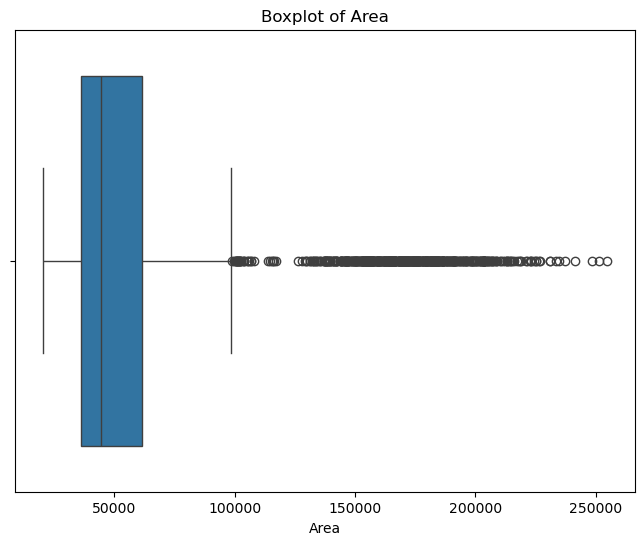

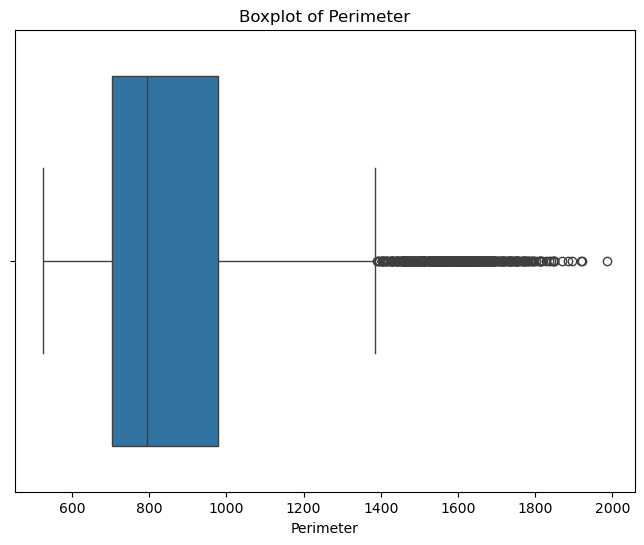

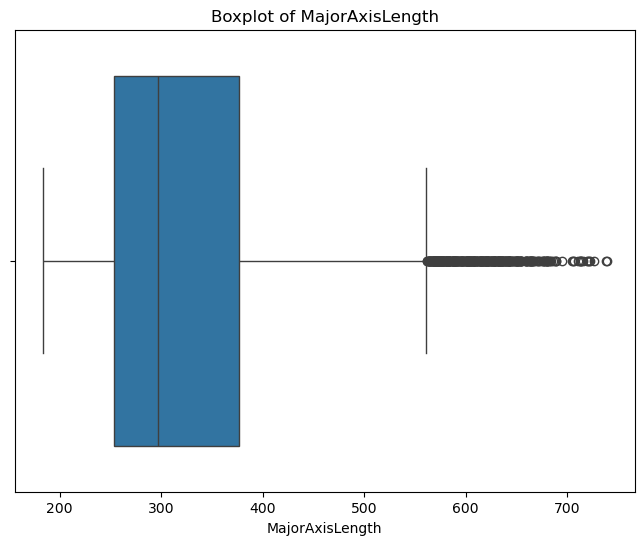

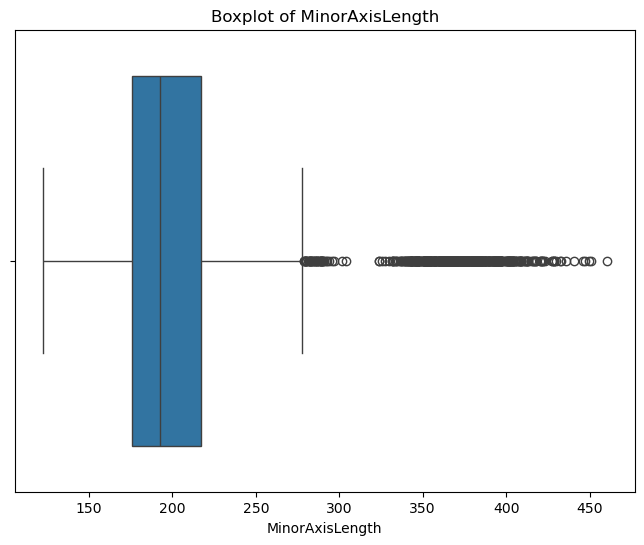

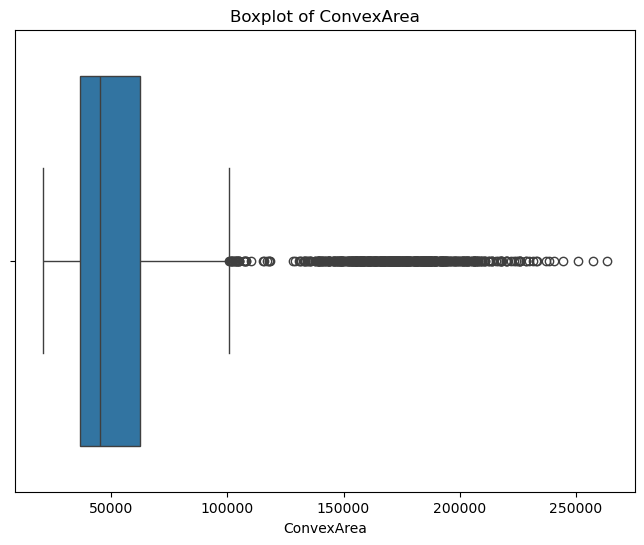

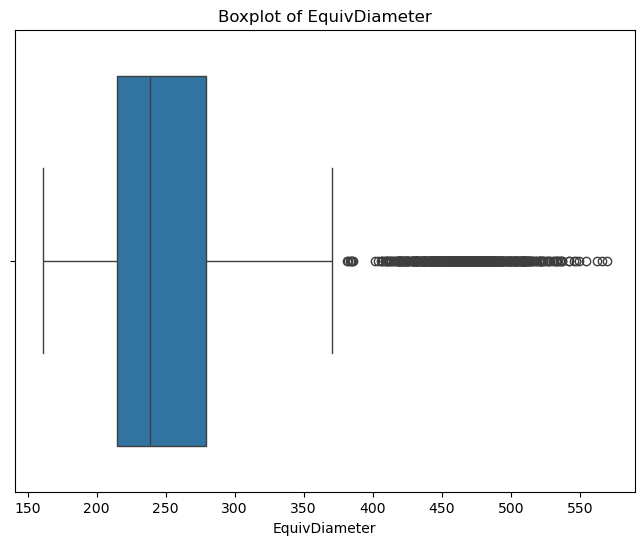

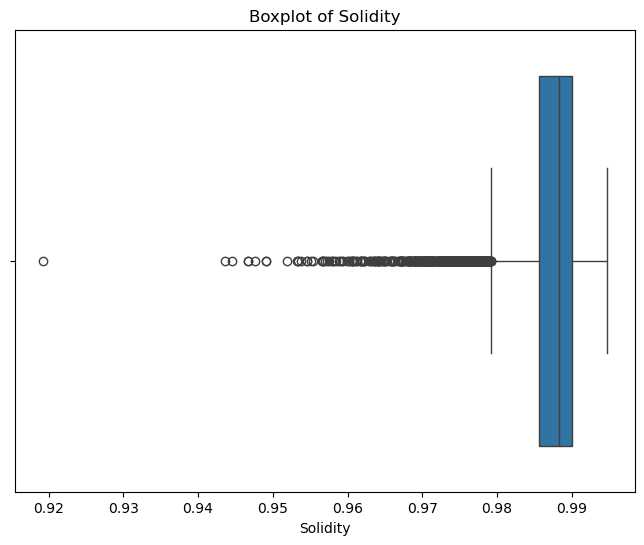

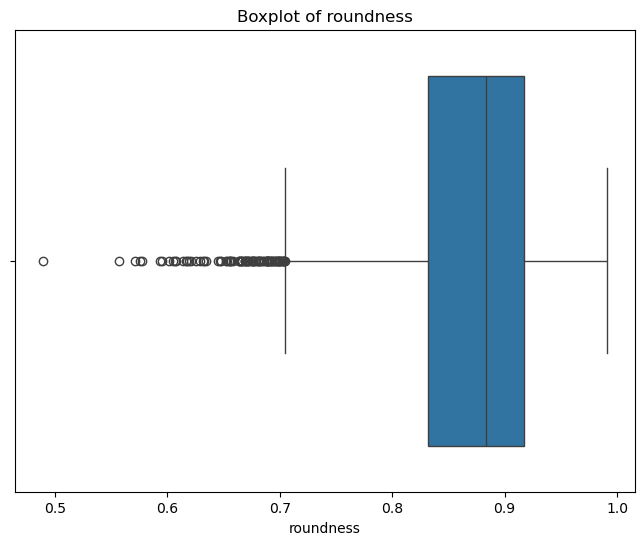

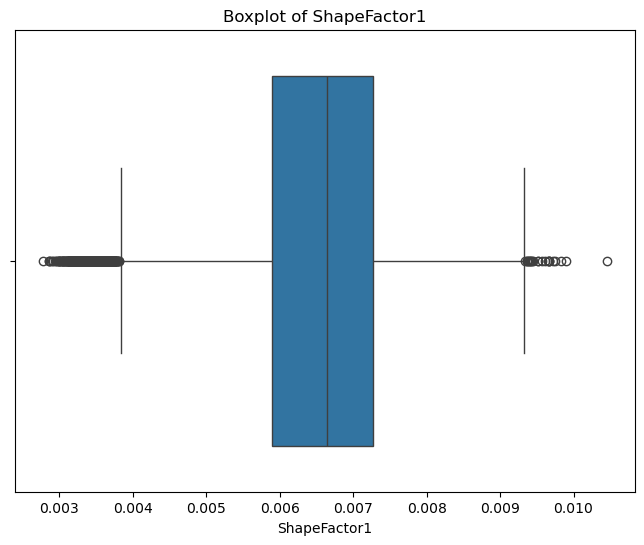

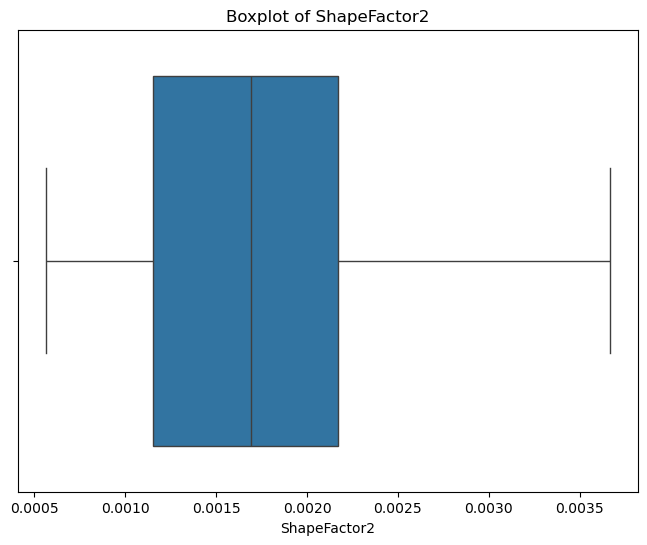

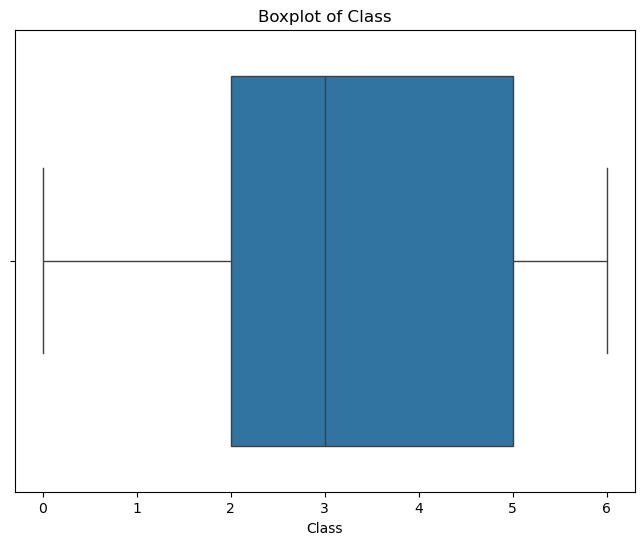

In [199]:
for col in df_filtered:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [205]:
for col in df_filtered:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[col] = df[col].clip(upper = upper_limit, lower = lower_limit)

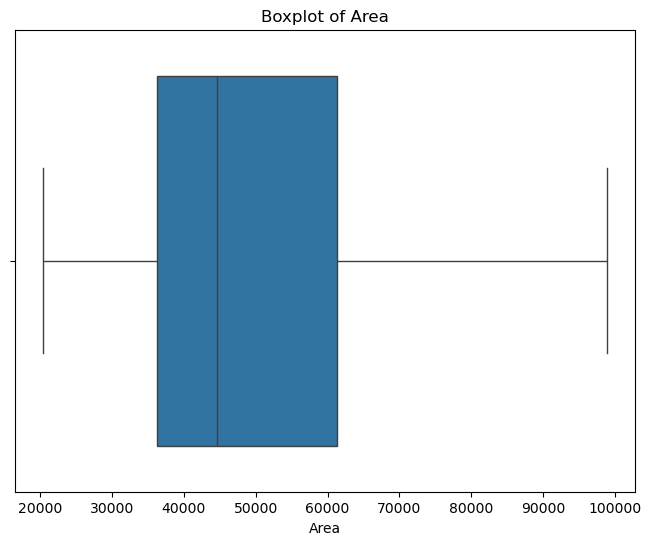

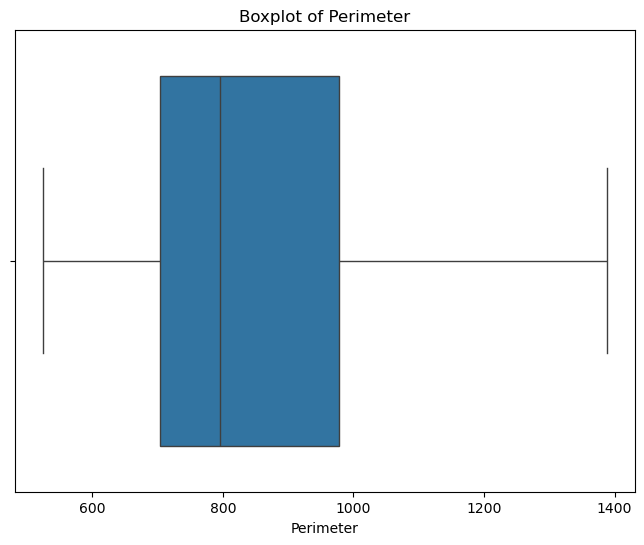

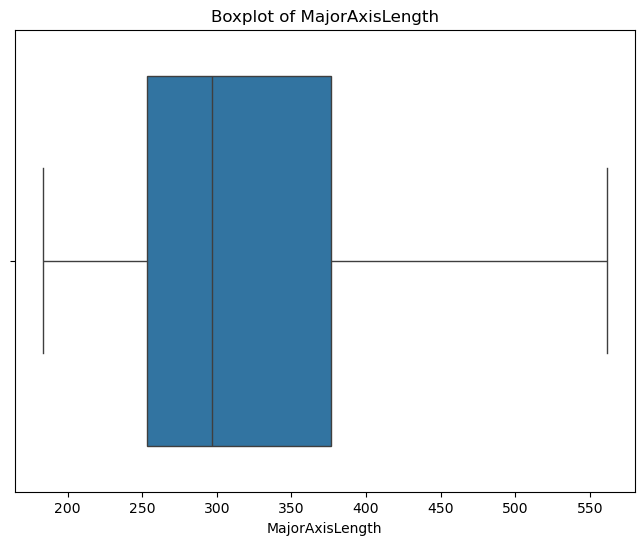

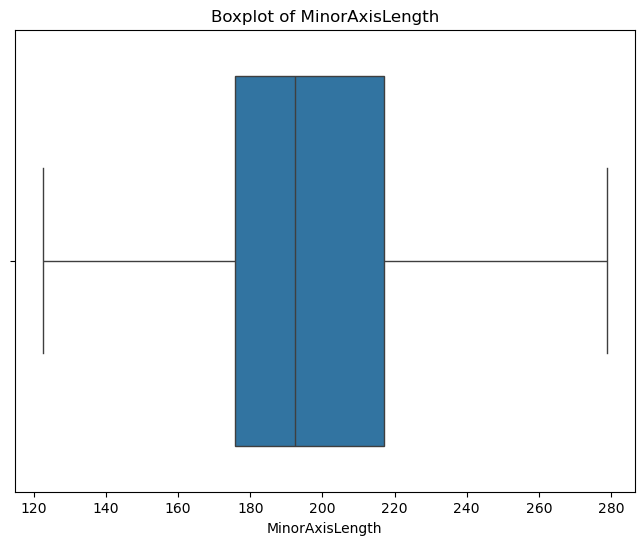

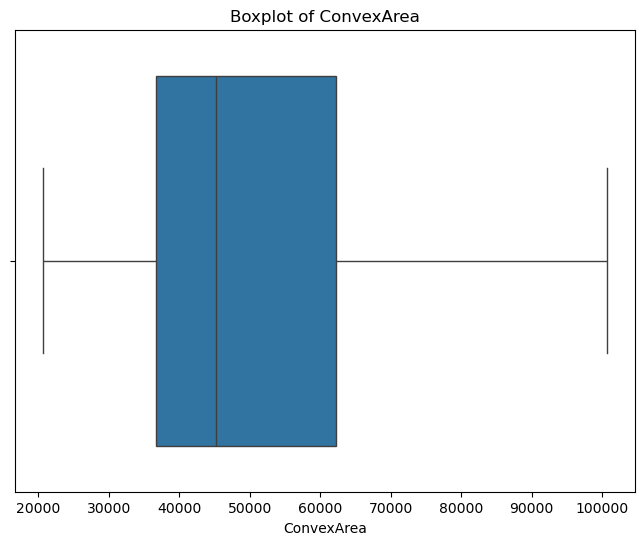

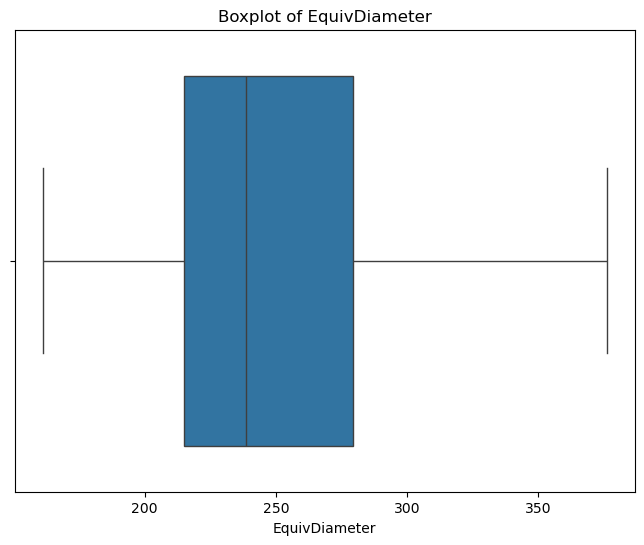

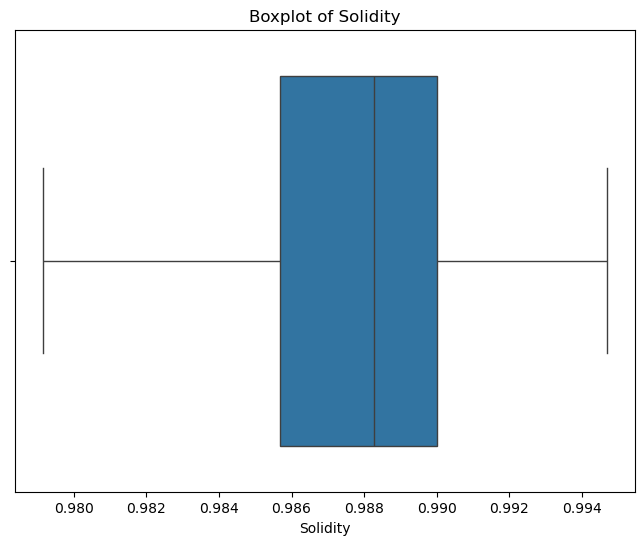

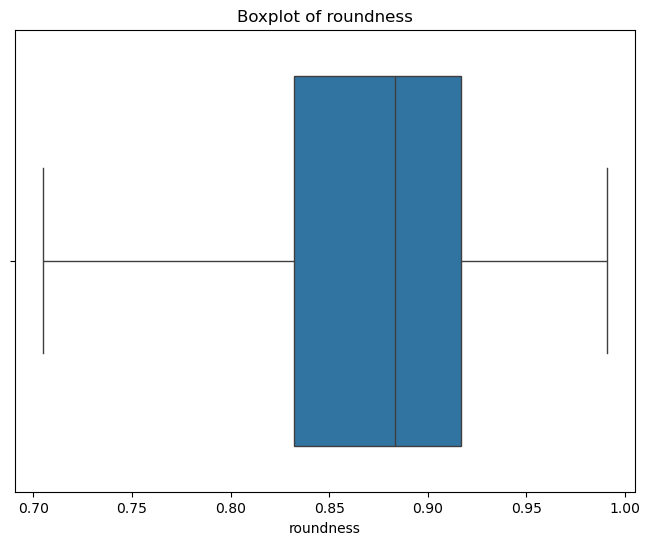

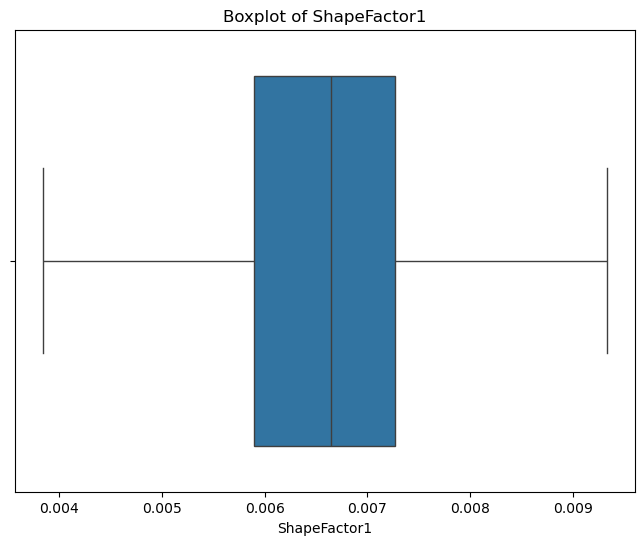

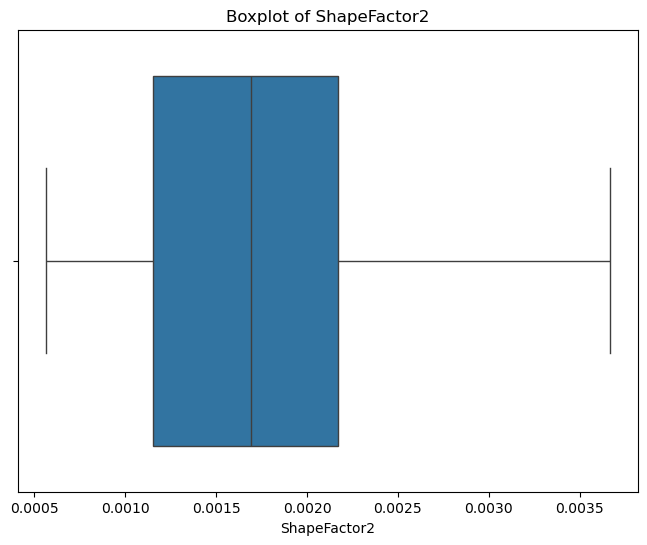

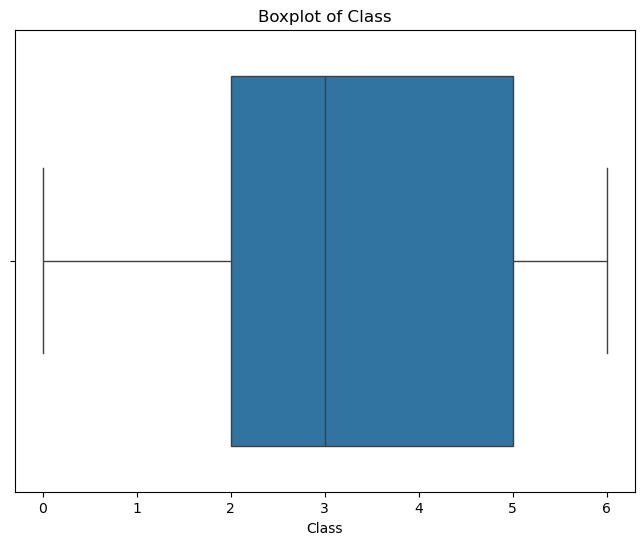

In [207]:
for col in df_filtered:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [240]:
# Scaling the data using min max scaler
scaler = MinMaxScaler()
df_scaled = df_filtered.drop('Class', axis=1)

scaled_df = scaler.fit_transform(df_scaled)

# Create a new DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_df, columns = df_scaled.columns)

scaled_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,ConvexArea,EquivDiameter,Solidity,roundness,ShapeFactor1,ShapeFactor2
0,0.034053,0.058574,0.044262,0.152142,0.033107,0.070804,0.922824,0.934823,0.593432,0.833049
1,0.035500,0.077557,0.030479,0.178337,0.034991,0.073577,0.871514,0.793138,0.547447,0.967315
2,0.038259,0.068035,0.052633,0.158190,0.037126,0.078816,0.932141,0.914511,0.582016,0.800942
3,0.040940,0.082942,0.048548,0.177691,0.041389,0.083854,0.761614,0.826871,0.552408,0.854744
4,0.041504,0.065313,0.032862,0.200679,0.040123,0.084906,0.949832,0.988408,0.510741,1.000000
...,...,...,...,...,...,...,...,...,...,...
13606,0.092559,0.160862,0.189318,0.187843,0.089967,0.172180,0.942381,0.852151,0.531785,0.382135
13607,0.092576,0.159358,0.176450,0.201964,0.089910,0.172207,0.915227,0.785351,0.509582,0.426233
13608,0.092739,0.160605,0.176384,0.203370,0.090219,0.172463,0.936648,0.855785,0.508683,0.427019
13609,0.092773,0.163657,0.179703,0.200669,0.090623,0.172517,0.908991,0.834795,0.514216,0.415330


### **Spliting the data into train and test

In [242]:
x = scaled_df
y = df_filtered['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [217]:
x_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,ConvexArea,EquivDiameter,Solidity,roundness,ShapeFactor1,ShapeFactor2
11073,0.036960,0.076417,0.092678,0.105189,0.036302,0.076358,0.884449,0.823595,0.691550,0.540022
13172,0.075454,0.157774,0.157542,0.169519,0.074335,0.144515,0.856549,0.697902,0.565422,0.434747
11587,0.045043,0.086805,0.083858,0.146264,0.043838,0.091462,0.922827,0.852534,0.606539,0.637164
12492,0.060501,0.110013,0.124987,0.154276,0.058872,0.119113,0.927999,0.869276,0.591215,0.506862
430,0.066329,0.126902,0.122573,0.176206,0.064705,0.129160,0.915324,0.811109,0.550166,0.545546
...,...,...,...,...,...,...,...,...,...,...
5191,0.268348,0.406017,0.477025,0.341247,0.261138,0.402713,0.950028,0.694211,0.339889,0.115760
13418,0.082995,0.157915,0.180137,0.168554,0.080989,0.156882,0.915079,0.774606,0.565350,0.381439
5390,0.297119,0.432595,0.492086,0.384502,0.289005,0.434365,0.955790,0.710218,0.299449,0.122500
860,0.076884,0.127805,0.113632,0.225189,0.074677,0.146883,0.943112,0.926980,0.474646,0.643451


In [219]:
y_train

11073    3
13172    3
11587    3
12492    3
430      5
        ..
5191     2
13418    3
5390     2
860      5
7270     4
Name: Class, Length: 10888, dtype: int32

# **Model Selection**

In [222]:
# Training using RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [224]:
y_pred = model.predict(x_test)

In [226]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       261
           1       1.00      1.00      1.00       117
           2       0.89      0.95      0.92       317
           3       0.90      0.91      0.90       671
           4       0.96      0.95      0.96       408
           5       0.94      0.93      0.94       413
           6       0.86      0.85      0.86       536

    accuracy                           0.91      2723
   macro avg       0.92      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723



In [244]:
# Training using LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [230]:
y_pred = model.predict(x_test)

In [232]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       261
           1       1.00      1.00      1.00       117
           2       0.90      0.96      0.93       317
           3       0.91      0.89      0.90       671
           4       0.97      0.96      0.96       408
           5       0.96      0.93      0.94       413
           6       0.83      0.89      0.86       536

    accuracy                           0.91      2723
   macro avg       0.93      0.92      0.93      2723
weighted avg       0.92      0.91      0.91      2723



In [234]:
# Training using DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)    

DecisionTreeClassifier()

In [236]:
y_pred = model.predict(x_test)

In [238]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f'Decision Tree R-squared: {r2}')
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.9610723466764598
Decision Tree R-squared: 0.7150127874680814
Mean Absolute Error: 0.3139919206757253


## **The Random Forest Classifier gives the best model as it has an accuracy score of 91%**